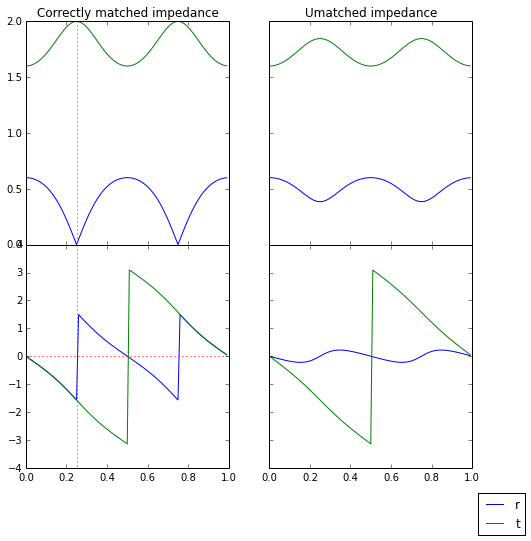

In [48]:
from __future__ import division
import pylab
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from cmath import exp, pi, phase
plt.rcParams['figure.figsize'] = (8.0, 8.0)

def wave_match(Z1, Z2, Z3, k, l):
    p = exp(1j * k * l)
    
    A = np.array([
            [-1, 1, 1, 0],
            [1, Z1/Z2, -Z1/Z2, 0],
            [0, 1/p, p, -1],
            [0, 1/p, -p, -Z2/Z3],
        ])
    
    b = np.array([1,1,0,0])
    
    #solve Ax = b for x
    x = np.linalg.solve(A,b);
    
    return {"r": x[0], "t": x[3]}

    

def a(l): return wave_match(Z1 = 1,Z2 = 2,Z3 = 4, k = 2*pi, l=l)
def b(l): return wave_match(Z1 = 1,Z2 = 3,Z3 = 4, k = 2*pi, l=l)

L = np.arange(0, 1, 0.01)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.subplots_adjust(hspace=0)
ax1.set_title("Correctly matched impedance")
ax2.set_title("Umatched impedance")


r, = ax1.plot(L, [abs(a(l)["r"]) for l in L ])
t, = ax1.plot(L, [abs(a(l)["t"]) for l in L ])
ax1.plot((0.25, 0.25), (2.0, 0), "r:")
_ = plt.figlegend((r,t), ("r", "t"), "lower right")


ax3.plot(L, [phase(a(l)["r"]) for l in L ])
ax3.plot(L, [phase(a(l)["t"]) for l in L ])
ax3.plot((0.25, 0.25), (4, -4), "r:")
ax3.plot((0, 1), (0, 0), "r:")


ax2.plot(L, [abs(b(l)["r"]) for l in L ])
ax2.plot(L, [abs(b(l)["t"]) for l in L ])

ax4.plot(L, [phase(b(l)["r"]) for l in L ])
_ = ax4.plot(L, [phase(b(l)["t"]) for l in L ])



The red line corresponds to quarter wave matching because $$l = \frac{\lambda_2}{4} = 0.25$$ 
and we see that the phase shift is 0 at this point too.